In [3]:
import os
import io
import gym
import time
import torch
# import torch.nn as nn
import pickle
import inspect
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# plt.style.use('seaborn-whitegrid')

import gym_unrealcv
import real_lsd

I0221 07:53:02.840643 33063 __init__.py:32] Registered env: MyUnrealLand-cpptestFloorGood-DiscreteColor-v0
I0221 07:53:02.842322 33063 __init__.py:32] Registered env: MyUnrealLand-cpptestFloorBad-DiscreteColor-v0
I0221 07:53:02.843266 33063 __init__.py:32] Registered env: MyUnrealLand-cpptestFloorGood-DiscreteDepth-v0
I0221 07:53:02.844444 33063 __init__.py:32] Registered env: MyUnrealLand-cpptestFloorBad-DiscreteDepth-v0
I0221 07:53:02.846098 33063 __init__.py:32] Registered env: MyUnrealLand-cpptestFloorGood-DiscreteRgbd-v0
I0221 07:53:02.848987 33063 __init__.py:32] Registered env: MyUnrealLand-cpptestFloorBad-DiscreteRgbd-v0
I0221 07:53:02.852787 33063 __init__.py:32] Registered env: MyUnrealLand-cpptestFloorGood-DiscretePoseColor-v0
I0221 07:53:02.853943 33063 __init__.py:32] Registered env: MyUnrealLand-cpptestFloorBad-DiscretePoseColor-v0
I0221 07:53:02.855369 33063 __init__.py:32] Registered env: MyUnrealLand-cpptestFloorGood-DiscreteHeightFeatures-v0
I0221 07:53:02.856431 3306

In [4]:
def files_in_dataset(dataset):
    dir = 'data'
    path = os.path.dirname(real_lsd.__file__)
    path = os.path.split(path)[0]
    assert dir in os.listdir(path)
    path = path + '/' + dir + '/' + dataset
    list_of_files = os.listdir(path)
    return list_of_files
    

In [5]:
def get_episode_mean_reward(data):
    num_of_episodes = data.shape[1]
    avg_rewards = np.zeros(num_of_episodes)
    for i in range(num_of_episodes):
        avg_rewards[i] = np.asarray(doc['episode_{}'.format(i+1)]['rewards']).mean()
    return avg_rewards

In [7]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [8]:
def load_obj(dataset, filename):
    dir = 'data'
    path = os.path.dirname(real_lsd.__file__)
    path = os.path.split(path)[0]
    assert dir in os.listdir(path)
    path = path + '/' + dir + '/' + dataset + '/'
    with open(path + filename + '.pkl', 'rb') as f:
        return CPU_Unpickler(f).load()

### Dataset One

In [6]:
# Dataset One
files_in_dataset('dataset_one')

['20210219_0929174.pkl', 'specs.txt']

In [68]:
doc = load_obj('dataset_one', '20210219_0929174')

In [87]:
np.asarray(doc['episode_1']['rewards']).mean()
avg_rewards = np.zeros(20)
for i in range(20):
    avg_rewards[i] = np.asarray(doc['episode_{}'.format(i+1)]['rewards']).mean()


In [122]:
avg_rewards.mean()

-554.7288110953323

In [124]:
data = pd.DataFrame.from_dict(doc)
data

,episode_1,episode_10,episode_11,episode_12,episode_13,episode_14,episode_15,episode_16,episode_17,episode_18,...,episode_37,episode_38,episode_39,episode_4,episode_40,episode_5,episode_6,episode_7,episode_8,episode_9
actions,"[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 25, 25, 25, 18, 18, 18, 18, 18, 18, 1...","[18, 11, 11, 18, 18, 25, 25, 25, 18, 18, 18, 1...","[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...",...,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 25, 2...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[11, 11, 11, 19, 11, 19, 11, 19, 11, 19, 11, 1...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1..."
dists,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...",...,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ..."
log_probs,"[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -0.4782099, -1....","[-1.192093e-07, -0.32304516, -1.192093e-07, -1...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...",...,"[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-0.0010762044, -1.192093e-07, -0.12887897, -1...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ..."
rewards,"[-453.95269580173147, -451.8361381161518, -449...","[-584.6971389465577, -584.4361647651083, -584....","[-589.5893647678679, -589.5880060017903, -589....","[-582.0225786496424, -581.6454583465727, -581....","[-558.0393104003573, -557.4288687954056, -556....","[-588.1555025407549, -587.9563716232237, -587....","[-590.1237231330017, -589.9848172638358, -589....","[-582.5226969463251, -582.5296102908276, -582....","[-584.0455006311486, -584.149138969038, -584.1...","[-595.8605765298214, -595.8183720044996, -595....",...,"[-562.8896336840502, -562.4019485745248, -561....","[-538.2255353570084, -539.381725959386, -

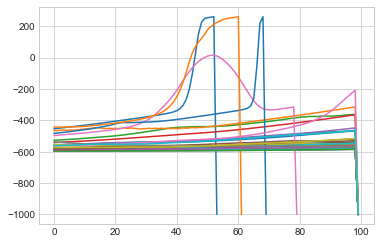

In [125]:
fig = plt.figure()
ax = plt.axes()

# plot twenty or so episodes
for i in range(1,41):
    rewards = data['episode_{}'.format(i)]['rewards']
    num_steps = len(data['episode_{}'.format(i)]['rewards'])
    steps = np.arange(num_steps)
    ax.plot(steps, rewards)


### Dataset Two

In [126]:
# Dataset Two
files_in_dataset('dataset_two')

['20210219_1124310.pkl',
 'specs.txt',
 '20210219_1137452.pkl',
 '20210219_1144253.pkl',
 '20210219_1151094.pkl',
 '20210219_1131101.pkl']

In [132]:
doc = load_obj('dataset_two', '20210219_1144253')

In [133]:
np.asarray(doc['episode_1']['rewards']).mean()
avg_rewards = np.zeros(20)
for i in range(20):
    avg_rewards[i] = np.asarray(doc['episode_{}'.format(i+1)]['rewards']).mean()

In [134]:
avg_rewards

array([-177.4215256 , -139.76451266, -131.26715325, -163.66508375,
       -161.48379672, -158.28857287, -156.29183541, -156.15297589,
       -171.11998341, -150.26863758, -173.55747909, -151.4371119 ,
       -172.63076439, -126.7303038 , -146.17885531, -140.89493132,
       -182.81170065, -152.70325972, -175.48575273, -179.87188765])

In [135]:
data = pd.DataFrame.from_dict(doc)
data

,episode_1,episode_10,episode_11,episode_12,episode_13,episode_14,episode_15,episode_16,episode_17,episode_18,...,episode_37,episode_38,episode_39,episode_4,episode_40,episode_5,episode_6,episode_7,episode_8,episode_9
actions,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...",...,"[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1...","[19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 1..."
dists,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...",...,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ..."
log_probs,"[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...",...,"[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ..."
rewards,"[-163.53523036517964, -163.65558749313755, -16...","[-128.5096262427126, -128.9402893812804, -129....","[-155.84777788957808, -156.01833738394544, -15...","[-141.52860069737835, -141.88172082682604, -14...","[-152.34129485157663, -152.6024146820846, -152...","[-101.13341707195949, -100.4262443661863, -99....","[-125.16774302361043, -125.08769675318783, -12...","[-119.3318034064699, -119.3733418822035, -119....","[-167.93820075504647, -167.99808164327015, -16...","[-137.39598400973063, -137.60626904407596, -13...",...,"[-171.66541953289328, -171.76119371090027, -17...","[-133.52947490209618, -133.4327484085696,

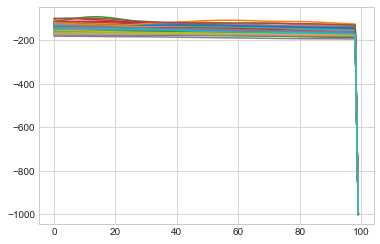

In [136]:
fig = plt.figure()
ax = plt.axes()

# plot twenty or so episodes
for i in range(1,41):
    rewards = data['episode_{}'.format(i)]['rewards']
    num_steps = len(data['episode_{}'.format(i)]['rewards'])
    steps = np.arange(num_steps)
    ax.plot(steps, rewards)

### Dataset Three

In [137]:
# Dataset Three
files_in_dataset('dataset_three')

['20210219_1330124.pkl',
 '20210219_1310091.pkl',
 'specs.txt',
 '20210219_1323313.pkl',
 '20210219_1316502.pkl',
 '20210219_1303280.pkl']

In [143]:
doc = load_obj('dataset_three', '20210219_1303280')

In [144]:
np.asarray(doc['episode_1']['rewards']).mean()
avg_rewards = np.zeros(20)
for i in range(20):
    avg_rewards[i] = np.asarray(doc['episode_{}'.format(i+1)]['rewards']).mean()

In [145]:
avg_rewards

array([-167.80458779, -119.73882223, -143.5049995 , -117.96768307,
       -138.22756635, -154.58237089, -174.1270948 ,  -94.9970105 ,
       -135.97546569, -129.17958558, -174.54507875, -134.55145601,
       -131.57014847, -129.51152443, -143.05264193, -102.01407283,
       -150.62317173, -137.29989961, -104.1501498 , -178.71911206])

In [146]:
data = pd.DataFrame.from_dict(doc)
data

,episode_1,episode_10,episode_11,episode_12,episode_13,episode_14,episode_15,episode_16,episode_17,episode_18,...,episode_37,episode_38,episode_39,episode_4,episode_40,episode_5,episode_6,episode_7,episode_8,episode_9
actions,"[1, 14, 7, 15, 4, 5, 12, 8, 12, 7, 16, 14, 19,...","[9, 0, 12, 19, 25, 11, 12, 14, 26, 22, 25, 11,...","[1, 12, 21, 0, 2, 2, 22, 14, 16, 26, 8, 8, 24,...","[13, 12, 16, 24, 19, 6, 21, 6, 3, 10, 9, 22, 5...","[12, 2, 13, 1, 22, 12, 3, 23, 12, 10, 1, 10, 0...","[1, 25, 11, 1, 11, 9, 16, 20, 19, 9, 0, 0, 0, ...","[6, 8, 21, 4, 0, 19, 6, 25, 17, 21, 19, 23, 22...","[6, 5, 11, 22, 13, 13, 10, 16, 21, 14, 24, 16,...","[14, 0, 14, 15, 5, 7, 18, 10, 17, 13, 19, 25, ...","[19, 2, 12, 23, 24, 26, 7, 2, 1, 23, 15, 11, 1...",...,"[15, 19, 5, 20, 19, 12, 26, 3, 18, 22, 23, 20,...","[4, 21, 23, 13, 10, 13, 1, 0, 16, 22, 14, 14, ...","[14, 11, 10, 2, 12, 11, 26, 8, 17, 23, 19, 9, ...","[26, 4, 0, 25, 22, 0, 10, 19, 7, 10, 12, 6, 6,...","[4, 2, 0, 4, 26, 8, 15, 1, 11, 21, 23, 14, 8, ...","[26, 5, 1, 14, 20, 6, 1, 25, 1, 3, 7, 19, 7, 0...","[7, 24, 10, 5, 23, 12, 21, 18, 16, 19, 9, 20, ...","[0, 14, 26, 20, 3, 4, 4, 7, 1, 3, 20, 5, 6, 26...","[10, 3, 21, 9, 26, 12, 14, 0, 24, 9, 15, 19, 1...","[10, 15, 10, 14, 11, 14, 1, 13, 6, 0, 26, 22, ..."
dists,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...",...,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ..."
log_probs,"[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...",...,"[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -..."
rewards,"[-157.01078087551883, -157.3739928916276, -157...","[-119.9771599865886, -119.9771599865886, -120....","[-165.62604712096436, -165.46175092363507, -16...","[-123.10346416125907, -122.85552245473758, -12...","[-123.51038312462276, -123.6832771959831, -123...","[-121.79535416995091, -121.9705466689756, -121...","[-134.49189184618885, -135.04435668069587, -13...","[-86.69115591862092, -86.84932448097925, -87.1...","[-141.98988016388205, -141.98988016388205, -14...","[-129.4868263234261, -129.21831164328117, -129...",...,"[-133.24973967265896, -132.99435609732063, -13...","[-139.73562490357511, -139.86400461747095

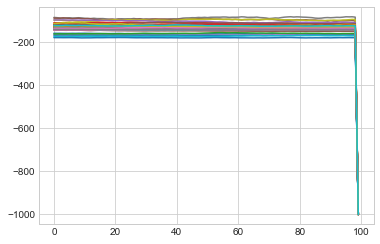

In [147]:
fig = plt.figure()
ax = plt.axes()

# plot twenty or so episodes
for i in range(1,41):
    rewards = data['episode_{}'.format(i)]['rewards']
    num_steps = len(data['episode_{}'.format(i)]['rewards'])
    steps = np.arange(num_steps)
    ax.plot(steps, rewards)

### Dataset Four

In [45]:
# Dataset Four
files_in_dataset('dataset_four')

['20210219_1500441.pkl', 'specs.txt']

In [46]:
doc = load_obj('dataset_four', '20210219_1500441')

In [47]:
avg_rewards = np.zeros(20)
for i in range(20):
    avg_rewards[i] = np.asarray(doc['episode_{}'.format(i+1)]['rewards']).mean()

In [48]:
avg_rewards

array([-121.1378574 , -121.4033011 , -125.87108685, -142.6804406 ,
       -127.10280944, -117.24817668, -183.16289564, -135.28574125,
       -137.52750986, -134.11236   , -140.5692808 , -130.15226995,
       -142.14506204, -124.12657158, -123.06212105, -137.94261063,
       -126.42364439,  -86.75644352, -125.72385214, -131.41071577])

In [49]:
data = pd.DataFrame.from_dict(doc)
data

,episode_1,episode_10,episode_11,episode_12,episode_13,episode_14,episode_15,episode_16,episode_17,episode_18,...,episode_37,episode_38,episode_39,episode_4,episode_40,episode_5,episode_6,episode_7,episode_8,episode_9
actions,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[25, 25, 20, 20, 25, 20, 25, 20, 25, 25, 20, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[20, 20, 21, 21, 20, 20, 21, 21, 21, 25, 21, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 25, 25, 2...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 18, 2...","[18, 18, 18, 18, 18, 25, 25, 25, 25, 25, 25, 2...",...,"[25, 25, 25, 18, 18, 25, 25, 25, 25, 25, 25, 2...","[25, 25, 25, 25, 25, 25, 20, 25, 20, 25, 20, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 2...","[20, 20, 20, 20, 20, 18, 20, 20, 20, 18, 20, 2...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 20, 18, 1...","[25, 25, 25, 25, 20, 25, 25, 20, 25, 20, 25, 2..."
dists,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...",...,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ..."
log_probs,"[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.0661055, -0.00011951446, -1...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-0.04090199, -4.5837023e-05, -0.0014840643, -...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-0.19928569, -3.0994463e-06, -9.536748e-07, -...","[-0.0006599219, -1.192093e-07, -5.960466e-07, ...",...,"[-2.384186e-07, -1.192093e-07, -0.0013184891, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -7.0634e-05, -0...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-1.192093e-07, -1.192093e-07, -1.192093e-07, ...","[-0.0037284773, -0.40148118, -7.9754194e-05, -..."
rewards,"[-147.92803120208492, -147.98924574181635, -14...","[-134.06070208255667, -134.4880227068892, -134...","[-157.00767565068256, -156.7223230217861, -156...","[-103.45450782284321, -104.49954408482029, -10...","[-141.60541484875554, -141.52363198305977, -14...","[-144.2243594326523, -143.90805572958737, -143...","[-116.25475947929948, -116.09552650276461, -11...","[-147.33780079526554, -147.07159520105262, -14...","[-122.82004228499264, -123.18213180008874, -12...","[-97.08604199766565, -97.11945971365549, -97.2...",...,"[-175.67090814616643, -175.36341623153248, -17...","[-120.99744860653783, -121.30279007463753

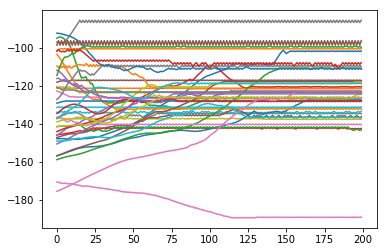

In [50]:
fig = plt.figure()
ax = plt.axes()

# plot twenty or so episodes
for i in range(1,41):
    rewards = data['episode_{}'.format(i)]['rewards']
    num_steps = len(data['episode_{}'.format(i)]['rewards'])
    steps = np.arange(num_steps)
    ax.plot(steps, rewards)

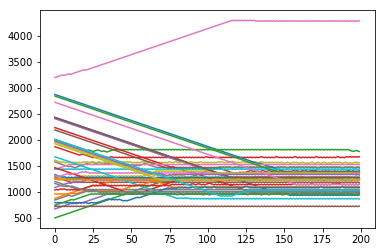

In [83]:
fig = plt.figure()
ax = plt.axes()

data['episode_{}'.format(1)]['states'][1][0]

for i in range(1,41):
    num_steps = len(data['episode_{}'.format(i)]['states'])
#     print(num_steps)
    steps   = np.arange(num_steps)
    heights = np.zeros(num_steps)
    
    for j in range(num_steps):
#         print(data['episode_{}'.format(i)]['states'][j][0])
        heights[j] = data['episode_{}'.format(i)]['states'][j][0]
        
#     print(heights)
    
    ax.plot(steps, heights)

### Dataset Five

In [165]:
# Dataset Five
files_in_dataset('dataset_five')

['20210219_1717393.pkl',
 '20210219_1650541.pkl',
 '20210219_1731134.pkl',
 'specs.txt',
 '20210219_1704132.pkl',
 '20210219_1637270.pkl']

In [166]:
doc = load_obj('dataset_five', '20210219_1650541')

In [167]:
avg_rewards = np.zeros(20)
for i in range(20):
    avg_rewards[i] = np.asarray(doc['episode_{}'.format(i+1)]['rewards']).mean()

In [168]:
avg_rewards

array([-135.16893309, -118.28805741, -174.67739841, -140.16156446,
       -142.86840109, -141.88223671, -144.63578232, -116.271151  ,
       -127.27414588, -151.9701929 , -165.45302604, -163.48589945,
       -159.68699788, -120.7995747 , -137.01752299, -103.34417404,
       -129.82021236, -130.38289667, -142.43915245, -131.54773134])

In [169]:
data = pd.DataFrame.from_dict(doc)
data

,episode_1,episode_10,episode_11,episode_12,episode_13,episode_14,episode_15,episode_16,episode_17,episode_18,...,episode_37,episode_38,episode_39,episode_4,episode_40,episode_5,episode_6,episode_7,episode_8,episode_9
actions,"[14, 23, 24, 6, 10, 16, 21, 24, 18, 20, 5, 24,...","[15, 19, 22, 0, 1, 3, 6, 26, 2, 6, 16, 8, 9, 4...","[6, 23, 8, 2, 2, 8, 25, 3, 23, 14, 18, 4, 14, ...","[11, 5, 3, 23, 18, 17, 2, 4, 11, 6, 25, 15, 0,...","[19, 23, 5, 4, 20, 3, 23, 15, 10, 7, 12, 0, 23...","[21, 2, 5, 16, 22, 7, 24, 8, 8, 8, 23, 2, 15, ...","[11, 6, 10, 7, 3, 25, 21, 1, 8, 5, 17, 14, 23,...","[1, 17, 5, 4, 19, 17, 7, 24, 1, 12, 13, 17, 18...","[1, 24, 16, 2, 21, 7, 4, 11, 26, 6, 4, 14, 17,...","[6, 15, 23, 2, 2, 0, 16, 4, 26, 25, 10, 18, 10...",...,"[26, 20, 18, 15, 13, 17, 11, 8, 13, 18, 23, 2,...","[20, 1, 6, 8, 24, 9, 25, 4, 0, 25, 18, 21, 19,...","[20, 14, 3, 21, 1, 1, 5, 9, 9, 21, 11, 16, 20,...","[15, 12, 26, 25, 1, 7, 0, 9, 3, 23, 3, 25, 18,...","[9, 5, 23, 13, 24, 18, 5, 22, 13, 15, 13, 1, 1...","[21, 11, 14, 4, 5, 16, 16, 7, 16, 20, 13, 22, ...","[13, 24, 9, 1, 16, 11, 26, 1, 0, 5, 13, 2, 4, ...","[12, 3, 12, 4, 26, 13, 10, 13, 11, 6, 22, 8, 2...","[21, 7, 21, 19, 4, 11, 26, 8, 21, 5, 18, 16, 1...","[17, 12, 24, 18, 2, 25, 11, 16, 8, 17, 13, 16,..."
dists,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...",...,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ..."
log_probs,"[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...",...,"[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -..."
rewards,"[-136.14099694266952, -135.8631922913993, -135...","[-154.66901998146238, -154.85337543857116, -15...","[-163.66985602830204, -163.9586299684558, -164...","[-162.7992914552563, -162.74616638244106, -162...","[-158.10552279493004, -158.22378970349047, -15...","[-121.96256495967941, -121.78483924277423, -12...","[-137.67880504181497, -137.3143138195429, -137...","[-100.84917783385377, -99.50027778293025, -99....","[-128.34731092337313, -128.7700317485495, -128...","[-129.24692525065012, -129.36641017821972, -12...",...,"[-133.18631670895104, -133.2392037231202, -132...","[-125.47018286935645, -125.60729954786353

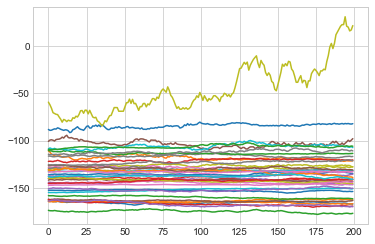

In [170]:
fig = plt.figure()
ax = plt.axes()

# plot twenty or so episodes
for i in range(1,41):
    rewards = data['episode_{}'.format(i)]['rewards']
    num_steps = len(data['episode_{}'.format(i)]['rewards'])
    steps = np.arange(num_steps)
    ax.plot(steps, rewards)

### Dataset Six

In [85]:
# Dataset Six
files_in_dataset('dataset_six')

['20210219_1914052.pkl',
 'specs.txt',
 '20210219_1902480.pkl',
 '20210219_1919133.pkl']

In [91]:
doc = load_obj('dataset_six', '20210219_1919133')

In [92]:
data = pd.DataFrame.from_dict(doc)
data

,episode_1,episode_10,episode_11,episode_12,episode_13,episode_14,episode_15,episode_16,episode_17,episode_18,...,episode_37,episode_38,episode_39,episode_4,episode_40,episode_5,episode_6,episode_7,episode_8,episode_9
actions,"[13, 18, 26, 14, 0, 5, 13, 18, 5, 3, 26, 14, 2...","[3, 2, 17, 6, 17, 5, 2, 11, 1, 25, 25, 17, 13,...","[12, 0, 26, 24, 23, 13, 3, 26, 7, 22, 21, 2, 7...","[10, 13, 19, 3, 26, 3, 8, 26, 5, 23, 2, 2, 9, ...","[2, 17, 4, 6, 5, 2, 20, 25, 26, 7, 26, 19, 23,...","[1, 5, 7, 13, 5, 22, 22, 5, 5, 8, 10, 3, 25, 5...","[3, 0, 6, 6, 23, 15, 5, 15, 11, 3, 17, 26, 2, ...","[6, 15, 17, 18, 2, 9, 4, 2, 8, 20, 26, 18, 26,...","[1, 11, 18, 6, 7, 4, 3, 6, 19, 9, 16, 19, 26, ...","[25, 7, 10, 14, 10, 10, 22, 18, 11, 19, 4, 20,...",...,"[20, 24, 8, 1, 23, 4, 21, 18, 0, 13, 17, 10, 1...","[24, 12, 7, 7, 23, 17, 0, 4, 14, 2, 0, 21, 12,...","[25, 21, 8, 4, 20, 25, 9, 18, 20, 13, 17, 18, ...","[22, 3, 8, 10, 8, 10, 4, 11, 8, 9, 22, 25, 19,...","[4, 16, 19, 20, 20, 5, 3, 19, 25, 5, 12, 3, 0,...","[26, 1, 25, 5, 15, 5, 6, 15, 2, 10, 14, 16, 7,...","[15, 25, 8, 4, 18, 24, 14, 2, 21, 5, 20, 21, 2...","[26, 24, 2, 5, 18, 21, 16, 7, 15, 14, 1, 3, 3,...","[0, 24, 19, 24, 4, 0, 21, 21, 25, 12, 2, 22, 2...","[4, 16, 6, 4, 1, 0, 1, 10, 21, 15, 7, 19, 8, 2..."
dists,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...",...,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ..."
log_probs,"[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...",...,"[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -..."
rewards,"[-151.04537219523127, -150.94101720073024, -15...","[-149.40163923867544, -149.28892160923075, -14...","[-138.90881504849688, -138.90881504849688, -13...","[-148.0926393260674, -148.17372482505095, -148...","[-126.90907702601295, -126.75965401122278, -12...","[-151.5761983175152, -151.62286578250496, -151...","[-134.04018244170757, -134.04018244170757, -13...","[-143.9745336495818, -144.32265273288772, -144...","[-83.19926273868144, -82.43503431720579, -80.1...","[-152.0214854903055, -152.06828225920108, -152...",...,"[-156.99970077637553, -156.9199895191329, -157...","[-137.85854128463944, -137.2454270967122,

In [93]:
avg_rewards = get_episode_mean_reward(data)
avg_rewards

array([-171.98582275, -115.98965737, -151.1212114 , -162.72464082,
       -119.90800757, -172.4743136 , -125.06016578, -159.54251871,
       -166.17107143, -152.94726418, -148.88219679, -155.60529346,
       -132.68710572, -157.81650939, -140.4237041 , -150.84015975,
        -89.33798146, -159.56170211, -155.49058192, -173.91225685,
       -169.15334173, -142.51484813, -160.94737172, -124.32076125,
       -137.13458447, -129.30074422, -149.14583295, -144.76627624,
       -177.84032568, -158.03230178, -125.1563135 , -173.57914096,
        -96.8430735 , -124.13049232, -161.34139596, -169.13684394,
       -166.16727423, -151.56287973, -107.02494185, -130.23090969])

In [94]:
avg_rewards.mean()

-146.52029547525623

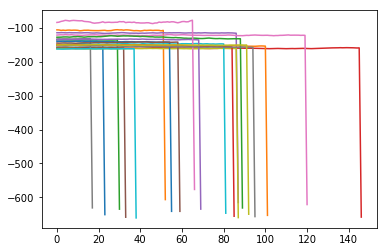

In [95]:
fig = plt.figure()
ax = plt.axes()

# plot twenty or so episodes
for i in range(1,21):
    rewards = data['episode_{}'.format(i)]['rewards']
    num_steps = len(data['episode_{}'.format(i)]['rewards'])
    steps = np.arange(num_steps)
    ax.plot(steps, rewards)

### Dataset Eight

In [211]:
# Dataset Eight
files_in_dataset('dataset_eight')

['20210220_1243111.pkl', 'specs.txt']

In [212]:
doc = load_obj('dataset_eight', '20210220_1243111')

In [224]:
data = pd.DataFrame.from_dict(doc)
data

,episode_1,episode_10,episode_11,episode_12,episode_13,episode_14,episode_15,episode_16,episode_17,episode_18,episode_19,episode_2,episode_20,episode_3,episode_4,episode_5,episode_6,episode_7,episode_8,episode_9
actions,"[5, 24, 16, 20, 10, 8, 18, 26, 1, 25, 2, 26, 1...","[0, 20, 5, 9, 19, 8, 22, 19, 25, 17, 17, 18, 2...","[0, 19, 13, 8, 13, 17, 0, 25, 26, 5, 2, 15, 26...","[4, 1, 1, 21, 23, 15, 23, 6, 5, 15, 26, 7, 2, ...","[6, 22, 20, 12, 4, 20, 12, 17, 5, 11, 7, 7, 4,...","[12, 7, 26, 4, 14, 25, 10, 18, 15, 3, 0, 13, 0...","[1, 18, 24, 16, 18, 25, 16, 8, 11, 19, 13, 11,...","[12, 26, 1, 12, 26, 22, 18, 3, 12, 2, 16, 19, ...","[23, 9, 7, 14, 17, 16, 21, 5, 4, 5, 1, 8, 7, 5...","[0, 8, 6, 23, 8, 26, 4, 19, 24, 17, 17, 24, 6,...","[22, 23, 23, 21, 18, 5, 24, 4, 12, 4, 6, 25, 2...","[4, 21, 16, 15, 22, 18, 0, 10, 13, 19, 10, 20,...","[4, 9, 18, 11, 7, 10, 7, 1, 4, 26, 16, 24, 11,...","[7, 23, 11, 7, 15, 17, 17, 10, 22, 3, 23, 8, 5...","[24, 14, 17, 26, 10, 5, 26, 23, 10, 5, 19, 8, ...","[9, 26, 18, 12, 4, 20, 7, 3, 20, 1, 18, 16, 11...","[22, 20, 23, 9, 5, 21, 20, 8, 5, 1, 10, 7, 16,...","[8, 1, 2, 24, 15, 12, 21, 13, 24, 1, 4, 4, 22,...","[4, 13, 4, 16, 1, 21, 11, 6, 24, 14, 2, 26, 4,...","[22, 25, 6, 2, 25, 20, 8, 20, 9, 4, 15, 3, 9, ..."
dists,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ..."
log_probs,"[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -..."
poses,"[[-1377.9156209194507, 1418.9375830366494, 182...","[[830.3290754792429, 313.799141381111, 2425.38...","[[-118.25440849840402, -1010.9522544325296, 18...","[[778.6410108985515, 1151.0106822556304, 2614....","[[86.34295237344554, -1318.5880023482916, 1765...","[[-521.6619188199564, -35.81262781588657, 1410...","[[299.54433109359206, -185.12184354444526, 688...","[[-794.5187054505852, -1463.2938366589171, 276...","[[873.395743401617, 1097.8286789468712, 2963.7...","[[-1486.4966576781885, 552.6358213501844, 2865...","[[-136.23027596013026, -258.76744370086567, 24...","[[-30.948697013876654, 300.32990410508546, 250...","[[-364.518838

In [220]:
avg_rewards = get_episode_mean_reward(data)
avg_rewards

array([-148.14834642, -167.81992754, -140.60985174, -133.28860447,
       -114.44969961, -184.69612544, -100.98671201, -149.0245977 ,
       -150.10628767, -155.27403278, -155.77691843, -161.07384353,
       -135.52256872, -148.20528502, -121.97294296, -175.88210615,
       -160.80588802, -181.55925967, -161.83229263,  -81.2953413 ])

In [221]:
avg_rewards.mean()

-146.4165315895212

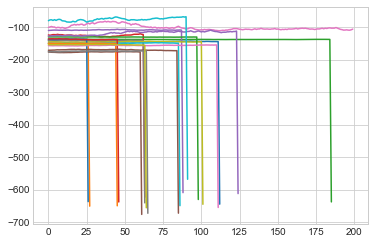

In [222]:
fig = plt.figure()
ax = plt.axes()

# plot twenty or so episodes
for i in range(1,21):
    rewards = data['episode_{}'.format(i)]['rewards']
    num_steps = len(data['episode_{}'.format(i)]['rewards'])
    steps = np.arange(num_steps)
    ax.plot(steps, rewards)

In [225]:
data['episode_1']['trajectory'] == data['episode_1']['poses']

True

### Dataset Nine

In [9]:
# Dataset Nine
files_in_dataset('dataset_nine')

['specs.txt', '20210220_1834120.pkl']

In [10]:
doc = load_obj('dataset_nine', '20210220_1834120')

In [11]:
data = pd.DataFrame.from_dict(doc)
data

,episode_1,episode_10,episode_100,episode_11,episode_12,episode_13,episode_14,episode_15,episode_16,episode_17,...,episode_90,episode_91,episode_92,episode_93,episode_94,episode_95,episode_96,episode_97,episode_98,episode_99
actions,"[17, 10, 2, 2, 14, 21, 25, 13, 5, 9, 25, 7, 26...","[2, 16, 18, 6, 5, 26, 9, 10, 7, 9, 21, 21, 16,...","[3, 17, 8, 0, 4, 16, 22, 23, 18, 18, 7, 26, 9,...","[7, 22, 13, 20, 23, 19, 20, 2, 11, 23, 19, 23,...","[6, 6, 26, 9, 6, 17, 21, 0, 25, 15, 17, 24, 7,...","[5, 7, 21, 2, 16, 24, 8, 0, 1, 20, 19, 5, 25, ...","[24, 4, 15, 15, 9, 8, 0, 19, 9, 4, 6, 5, 21, 2...","[10, 17, 20, 2, 23, 6, 12, 19, 8, 1, 20, 23, 1...","[15, 9, 1, 17, 4, 5, 15, 24, 24, 20, 10, 10, 1...","[8, 16, 22, 26, 26, 19, 0, 15, 23, 13, 3, 25, ...",...,"[24, 23, 0, 19, 10, 26, 23, 5, 2, 9, 14, 9, 21...","[14, 3, 21, 22, 7, 1, 11, 8, 3, 12, 0, 2, 20, ...","[25, 24, 1, 13, 23, 13, 20, 11, 9, 21, 12, 16,...","[24, 15, 12, 15, 2, 21, 4, 25, 9, 5, 12, 2, 18...","[24, 21, 4, 7, 23, 8, 23, 8, 22, 23, 11, 23, 1...","[19, 17, 13, 12, 13, 17, 9, 3, 14, 13, 21, 15,...","[26, 14, 11, 8, 11, 1, 19, 2, 2, 26, 6, 3, 7, ...","[6, 19, 6, 5, 14, 14, 13, 21, 6, 14, 14, 26, 1...","[12, 15, 8, 21, 26, 7, 15, 4, 22, 26, 7, 23, 0...","[12, 6, 15, 18, 20, 5, 23, 15, 5, 20, 15, 25, ..."
dists,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...",...,"[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ...","[Categorical(probs: torch.Size([27]), logits: ..."
log_probs,"[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...",...,"[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -...","[-3.295837, -3.295837, -3.295837, -3.295837, -..."
poses,"[[-642.7390663810972, 1.7294083465435506, 1650...","[[-953.3809882984252, 1419.7488807329432, 1808...","[[-506.86215108115505, -912.4799838641486, 173...","[[733.904838327127, 608.1303967055978, 1294.85...","[[-1353.99146094085, -1452.8529586534717, 2503...","[[-8.299230121336223, 521.2048111063189, 1445....","[[-717.4015765047244, -1257.1785191030249, 263...","[[1310.4762836601376, 1277.01828562437, 805.70...","[[888.680553159616, 543.8737927511393, 1250.60...","[[280.96376563650165, 275.4929683917569, 1570....",...,"[[-356.3848310973665, 1442.2101296208407, 1161...","[[-709.5625257478131, -1161.40481806

In [12]:
avg_rewards = get_episode_mean_reward(data)
avg_rewards

array([-128.69261204, -147.79496418,  -86.05199819, -149.39847188,
       -150.60184161, -129.37713771, -147.04847406, -160.72775536,
       -141.42559816, -136.99117049, -116.26069008, -168.34041123,
       -126.51669719, -164.91276611, -112.97431843, -115.79324855,
       -129.48960481, -135.05328131, -159.00175426, -149.7629677 ,
       -145.04576397, -131.81615637, -153.66029504, -154.56361636,
       -163.21776309, -152.41658868, -115.39008884, -113.59569573,
       -155.04802606,  -79.14090776, -134.73244896, -126.35932083,
       -129.30207783, -134.07712409, -139.05340963, -152.13528447,
       -139.26325261, -103.6360158 , -134.75817565, -123.16827353,
       -138.13355522, -120.16370858, -119.24665549, -140.59856038,
       -145.01857843, -146.95624699, -114.49576256, -155.79505641,
       -126.3961286 , -160.69510334, -144.5777689 , -121.51725981,
       -150.49274084, -134.05463452, -107.5959695 , -142.40779871,
       -149.16188126, -132.067781  , -152.09744614, -139.76967

In [13]:
avg_rewards.mean()

-133.78924378733734

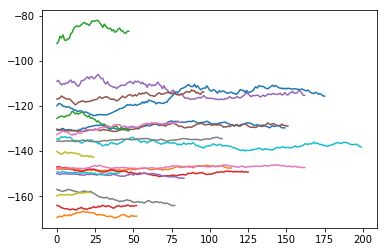

In [14]:
fig = plt.figure()
ax = plt.axes()

# plot twenty or so episodes
for i in range(1,21):
    rewards = data['episode_{}'.format(i)]['rewards']
    num_steps = len(data['episode_{}'.format(i)]['rewards'])
    steps = np.arange(num_steps)
    ax.plot(steps, rewards)

In [15]:
import k3d
import numpy as np

In [40]:
num_of_episodes = data.shape[1]

plot = k3d.plot()


for ep in range(num_of_episodes):
    steps = len(data['episode_{}'.format(ep+1)]['trajectory'])
    x = np.zeros(steps, dtype=np.float32)
    y = np.zeros(steps, dtype=np.float32)
    z = np.zeros(steps, dtype=np.float32)

    for i in range(steps):
        x[i] = data['episode_{}'.format(ep+1)]['trajectory'][i][0]
        y[i] = data['episode_{}'.format(ep+1)]['trajectory'][i][1]
        z[i] = data['episode_{}'.format(ep+1)]['trajectory'][i][2]

    line = np.stack((x,y,z), axis=1)

    plot += k3d.line(line, width=1, shader='mesh', compression_level=9)
    
plot.display()

Output()

### Dataset Ten

In [ ]:
# Dataset Ten
files_in_dataset('dataset_ten')

In [ ]:
doc = load_obj('dataset_ten', '20210220_1834120')

In [ ]:
data = pd.DataFrame.from_dict(doc)
data

In [100]:
avg_rewards = get_episode_mean_reward(data)
avg_rewards

array([-171.98582275, -115.98965737, -151.1212114 , -162.72464082,
       -119.90800757, -172.4743136 , -125.06016578, -159.54251871,
       -166.17107143, -152.94726418, -148.88219679, -155.60529346,
       -132.68710572, -157.81650939, -140.4237041 , -150.84015975,
        -89.33798146, -159.56170211, -155.49058192, -173.91225685,
       -169.15334173, -142.51484813, -160.94737172, -124.32076125,
       -137.13458447, -129.30074422, -149.14583295, -144.76627624,
       -177.84032568, -158.03230178, -125.1563135 , -173.57914096,
        -96.8430735 , -124.13049232, -161.34139596, -169.13684394,
       -166.16727423, -151.56287973, -107.02494185, -130.23090969])

In [101]:
avg_rewards.mean()

-146.52029547525623

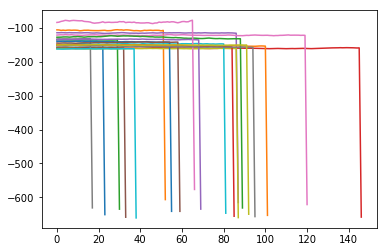

In [102]:
fig = plt.figure()
ax = plt.axes()

# plot twenty or so episodes
for i in range(1,21):
    rewards = data['episode_{}'.format(i)]['rewards']
    num_steps = len(data['episode_{}'.format(i)]['rewards'])
    steps = np.arange(num_steps)
    ax.plot(steps, rewards)

In [ ]:
num_of_episodes = data.shape[1]

plot = k3d.plot()

for ep in range(num_of_episodes):
    steps = len(data['episode_{}'.format(ep+1)]['trajectory'])
    x = np.zeros(steps, dtype=np.float32)
    y = np.zeros(steps, dtype=np.float32)
    z = np.zeros(steps, dtype=np.float32)

    for i in range(steps):
        x[i] = data['episode_{}'.format(ep+1)]['trajectory'][i][0]
        y[i] = data['episode_{}'.format(ep+1)]['trajectory'][i][1]
        z[i] = data['episode_{}'.format(ep+1)]['trajectory'][i][2]

    line = np.stack((x,y,z), axis=1)

    plot += k3d.line(line, width=1, shader='mesh', compression_level=9)
    
plot.display()